In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import ndtri


Narišite histogram dohodkov vseh družin v Kibergradu. Pri tem dohodke razdelite v enako široke razrede.
Širino posameznega razreda določite v skladu s Freedman–Diaconisovim pravilom,
Kjer sta q1/4 in q3/4 prvi in tretji kvartil, n pa je število enot. To vrednost nato
smiselno zaokrožite na število oblike k · 10^r, kjer je k ∈ {1, 2, 5} in r ∈ Z."""

In [4]:
pot = "kibergrad.csv"
data = pd.read_csv(pot)
lastnosti = data.columns
#print(data.head())

dohodki = data.iloc[:,[3]] #stolpec dohodkov

n = dohodki.size #tevilo vrstic oz podatkov
q1 = dohodki.describe().loc['25%'][0] #1. kvartil

q3 = dohodki.describe().loc['75%'][0] #3. kvartil

zacetek = int(dohodki.describe().loc['min'][0]) #zacetek histograma
konec = int(dohodki.describe().loc['max'][0])

sirina = 2*(q3 - q1)/np.cbrt(n)
sirina = int(sirina//1000*1000)

mu = dohodki.describe().loc["mean"][0]
std = dohodki.describe().loc["std"][0] 

zacetek = (zacetek // sirina) * sirina #da se zacnejo na celo "lepo" stevilo
konec = (konec // sirina + 1) * sirina

k = 0
y = []
while (k< (konec - zacetek)//sirina ): #st intervalov dolzine sirina
    a= int(dohodki[(dohodki >= zacetek+ k*sirina) & ( dohodki < zacetek + (k+1)*sirina )].count())
    y.append(a)
    k = k + 1

x = np.linspace(zacetek, konec, (konec - zacetek)//sirina+1)


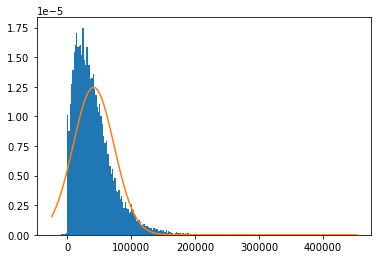

In [5]:
dohodki_np = dohodki.to_numpy()
#normirano
plt.figure()
plt.hist(dohodki_np, bins=((konec - zacetek)//sirina ), range=(zacetek, konec), density=True)
plt.plot(x, stats.norm.pdf(x, mu, std))
plt.show()

"""
Narišite kumulativno porazdelitveno funkcijo porazdelitve dohodkov družin v
Kibergradu in primerjajte s kumulativno porazdelitveno funkcijo ustrezne normalne porazdelitve.
"""

In [6]:
komulativno = np.cumsum(y)

X = []
for i in range(x.size-1):
    sredina = (x[i+1] + x[i])/2
    X.append(sredina)

y_cdf = stats.norm.cdf(X, mu, std)

komulativno = komulativno/komulativno[-1] #normiramo podatke 

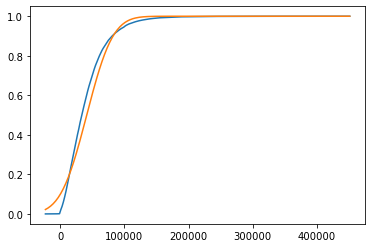

In [7]:
plt.figure()   
plt.plot(X, komulativno)
plt.plot(X, y_cdf)
plt.show()

"""
d) Narišite še primerjalni kvantilni (Q–Q) grafikon, ki porazdelitev dohodkov
družin v Kibergradu primerja z normalno porazdelitvijo (
"""

In [8]:
dohodki_np = np.hstack(dohodki_np)
urejen = np.sort(dohodki_np, axis=None ) #uredimo array 

#normalno porazdelitev razdelimo na n+1 delov. 

delcki = np.arange(1,n+1)/(n+1) #range ne vkluci zadnjega

#izracunamo teoreticne vrednosti porazdelitve
teoreticne_vrednosti = ndtri(delcki)


#normaliziramo nase vrednosti
norm_podatki = (urejen - mu)/std


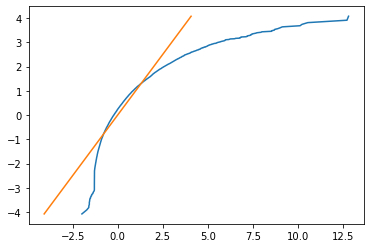

In [9]:
#narisemo graf 
plt.figure()
plt.plot(norm_podatki, teoreticne_vrednosti) #scatter da v tocke
plt.plot(teoreticne_vrednosti, teoreticne_vrednosti) #primerjava z normalno porazdelitvijo
plt.show()

"""
Vzemite 1000 enostavnih slučajnih vzorcev velikosti 400 in narišite histogram
vzorčnih povprečij dohodkov družin.
"""

In [10]:
vzorci_povprecja = []
var = [] #potrebujemo za f primer
m = 1000 #st vzorcev
for i in range(m):
    vzorec = dohodki.sample(n=400)
    vzorec_mean = vzorec.describe().loc['mean'][0] #povprecje vzorca
    vzorci_povprecja.append(vzorec_mean)
    #vzorec_var = np.std(vzorec, ddof=1) #deljeno z n-1
    #var.append(np.square(vzorec_var))

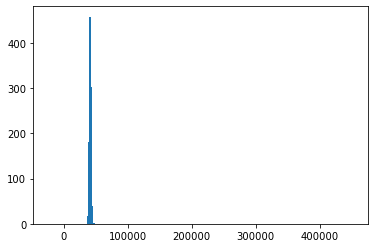

In [11]:
plt.figure()
plt.hist(vzorci_povprecja, bins=((konec - zacetek)//sirina ), range=(zacetek, konec))
plt.show()


In [12]:
vzorci_povprecja[0:5]
print(min(vzorci_povprecja))
print(max(vzorci_povprecja))

nov_zacetek = min(vzorci_povprecja)//sirina*sirina
nov_konec = (max(vzorci_povprecja)//sirina+1)*sirina


36499.1025
46093.3775


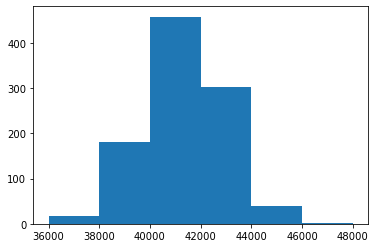

In [13]:
#Ker so razredi zelo skupaj si prilagodimo x os
plt.figure()
plt.hist(vzorci_povprecja, bins=(int((nov_konec - nov_zacetek)//sirina) ), range=(nov_zacetek, nov_konec))
plt.show()


"""f) Dorišite normalno gostoto, katere pričakovana vrednost se ujema s povprečnim
dohodkom na družino v Kibergradu, standardni odklon pa s standardno napako
za enostavni slučajni vzorec velikosti 400. Komentirajte, kako dobro se prilega."""

In [35]:
#standardna napake je standardni odklon povprečij. Torej kako so porazdeljena povprečja
povprecje_vzorcev = np.sum(vzorci_povprecja)/m #ker so ravno enake velikosti
#SE = np.sqrt(np.sum(var)/n)
S = np.std(vzorci_povprecja, ddof=1)
sigma = np.std(vzorci_povprecja, ddof=1)
izracunan_std = np.std(dohodki)
izracunan_SE = izracunan_std/np.sqrt(400)
abs(S - izracunan_SE) #Razlika je zelo majhna. 
izracunan_mu = np.mean(dohodki)
abs(izracunan_mu - povprecje_vzorcev) #Razlika je zelo majhna. 


'DOHODEK'    8.931274
dtype: float64

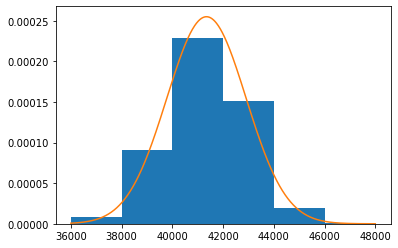

In [15]:
x = np.linspace(nov_zacetek, nov_konec, m) #namesto velikega st int((nov_konec - nov_zacetek)//sirina+1) za enako stevilo intervalov
plt.figure()
plt.hist(vzorci_povprecja, bins=(int((nov_konec - nov_zacetek)//sirina) ), range=(nov_zacetek, nov_konec), density=True) #normirana
plt.plot(x, stats.norm.pdf(x, povprecje_vzorcev, S))
plt.show()


Standardna napaka je ravno standardni odklon vzorčnih povprečij. 
Lahko bi ga računali tudi kot standardni odklon vseh 40000 podatkov deljeno z koren velikosti vzorca ki ga jemljemo.
Če bi bilo potrebno poračunati SE vzorčnih povprečij in to primerjati bi bil graf neprimerljivo ožji Vidimo, da so povprečja zelo ozko porazdeljena kar je pričakovano. Primerjajmo še z točno izračunanim povprečjem in standardno napako.

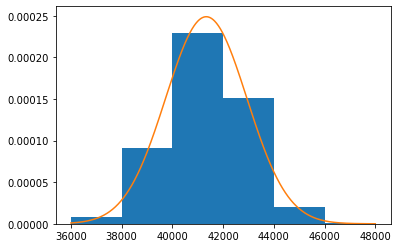

In [39]:
x = np.linspace(nov_zacetek, nov_konec, m)
plt.figure()
plt.hist(vzorci_povprecja, bins=(int((nov_konec - nov_zacetek)//sirina) ), range=(nov_zacetek, nov_konec), density=True) #normirana
plt.plot(x, stats.norm.pdf(x, izracunan_mu, izracunan_SE))
plt.show()



Grafa sta praktično enaka. 




Za vzorčna povprečja podobno kot prej narišite še kumulativno porazdelitveno
funkcijo in primerjalni kvantilni grafikon ter primerjajte z normalno porazdelitvijo. Komentirajte prileganje.

In [16]:

#res = stats.cumfreq(vzorci_povprecja, numbins=8)
#x = np.linspace(nov_zacetek, nov_konec,8)

#fig = plt.figure(figsize=(10, 4))
#ax1 = fig.add_subplot(1, 2, 1)
#ax1.hist(vzorci_povprecja, bins=x, range=(nov_zacetek, nov_konec))

#ax2 = fig.add_subplot(1, 2, 2)
#ax2.bar(x, res.cumcount, width=10, color="blue")
#plt.show()
y = stats.cumfreq(vzorci_povprecja, numbins=(int((nov_konec - nov_zacetek)//sirina)), defaultreallimits=(nov_zacetek, nov_konec))
len(y[0])
x = np.linspace(nov_zacetek + 1000, nov_konec - 1000, int((nov_konec - nov_zacetek)//sirina))
len(x)

6

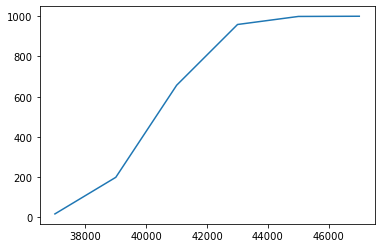

In [17]:
x = np.linspace(nov_zacetek, nov_konec, int((nov_konec - nov_zacetek)//sirina+1))
y = stats.cumfreq(vzorci_povprecja, numbins=(int((nov_konec - nov_zacetek)//sirina)), defaultreallimits=(nov_zacetek, nov_konec))
x = np.linspace(nov_zacetek + 1000, nov_konec - 1000, int((nov_konec - nov_zacetek)//sirina))
plt.figure()
komulativno = y[0]
plt.plot(x,komulativno)

plt.show()


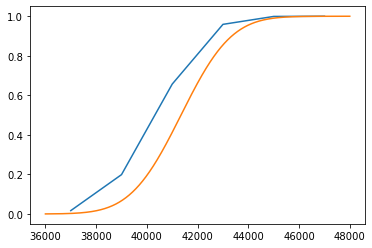

In [18]:

kom_norm = komulativno/komulativno[-1] #normirana komulativna porazdelitev
X = np.linspace(nov_zacetek, nov_konec, m)
y_cdf = stats.norm.cdf(X, povprecje_vzorcev, S)

plt.figure()
plt.plot(x, kom_norm)
plt.plot(X, y_cdf)
plt.show()

In [19]:
urejeno = np.sort(vzorci_povprecja) #uredimo po vrsti

#normalno porazdelitev razdelimo na n+1 delov. 
delcki = np.arange(1,m+1)/(m+1) #range ne vkluci zadnjega

#izracunamo teoreticne vrednosti porazdelitve
teoreticne_vrednosti = ndtri(delcki)


#normaliziramo nase vrednosti
norm_podatki = (urejeno - povprecje_vzorcev)/S


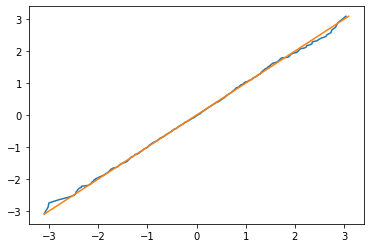

In [20]:
#narisemo graf 
plt.figure()
plt.plot(norm_podatki, teoreticne_vrednosti) #scatter da v tocke
plt.plot(teoreticne_vrednosti, teoreticne_vrednosti) #primerjava z normalno porazdelitvijo
plt.show()

Vzorčna povprečja so porazdeljena normalno. 